# IS709 Assignment 3

### Due: December 20, Sunday-23.59

### Submission and Grading Policy

- Submit your assignments to the corresponding assignment link in https://odtuclass.metu.edu.tr.
- Solutions should be submitted in a single **ipynb** file named: metu-username_HW_2.ipynb (e.g., “e123456_HW_3.ipynb”).
- Late submissions will be accepted by December 17, 2020 at 23:59 with a 5% per day penalty.
- Do not change variable names in the code blocks and the texts in the markdowns.
- **It is an individual assignment. You have to adhere to academic integrity principles.**
- You are supposed to be able to interpret your findings. Hence, you shouldn't just find a number or result and just leave it. You need to comment on your findings by giving as much as **necessary** details.  
  

In this assignment, you are going to deal with data preprocessing and do some data imputation. You are expected to comment on the aspects of the different imputation methods.  

**1. If you haven't alredy install missingno package please open anaconda prompt and install it by typing below code.**    
**conda install -c conda-forge missingno**   
You may want to see https://anaconda.org/conda-forge/missingno  

**2. Import the libraries you need.**  

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, matthews_corrcoef
from sklearn import tree

# answer
import pandas as pd
import numpy as np
import missingno as msno 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")

**3.Upload the data files as pandas dataframes.**   
Set dataframe name as **data** for assignment3_data.csv and **mis_data** for assignment3_missing_data.csv

In [2]:
### answer
data=pd.read_csv("assignment3_data.csv")
mis_data=pd.read_csv("assignment3_missing_data.csv")
mis_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,target
0,54.52,2.22,10.386904,0,6,NaN,34.54,20.91,NaN,61.7,8.73,0
1,45.06,8.71,16.769842,0,3,74.88,46.53,NaN,NaN,64.0,10.08,1
2,42.68,2.07,7.502324,1,6,67.82,26.48,25.08,21.74,62.3,11.40,0
3,28.96,9.19,NaN,1,8,54.74,NaN,22.36,18.75,57.3,16.85,1
4,40.06,4.88,22.511603,1,7,61.57,28.38,NaN,17.62,NaN,12.74,0


In [3]:
for columns in data:
    print(columns,"--> # of missing value", data[columns].isna().sum() )

x1 --> # of missing value 0
x2 --> # of missing value 0
x3 --> # of missing value 0
x4 --> # of missing value 0
x5 --> # of missing value 0
x6 --> # of missing value 0
x7 --> # of missing value 0
x8 --> # of missing value 0
x9 --> # of missing value 0
x10 --> # of missing value 0
x11 --> # of missing value 0
target --> # of missing value 0


**4. Find the number of missing values in each attribute.    
Draw bar chart, matrix,  and heatmap of missingno package and comment on your results.**  

<font color=#C91414> Hint: Please be aware that missingness pattern and missingness mechanishm are different. Missingno charts give idea about missingness pattern.</font>   


x1 --> # of missing value 0 percentage= 0.0000
x2 --> # of missing value 299 percentage= 9.9667
x3 --> # of missing value 393 percentage= 13.1000
x4 --> # of missing value 0 percentage= 0.0000
x5 --> # of missing value 0 percentage= 0.0000
x6 --> # of missing value 819 percentage= 27.3000
x7 --> # of missing value 440 percentage= 14.6667
x8 --> # of missing value 280 percentage= 9.3333
x9 --> # of missing value 150 percentage= 5.0000
x10 --> # of missing value 439 percentage= 14.6333
x11 --> # of missing value 0 percentage= 0.0000
target --> # of missing value 0 percentage= 0.0000


<AxesSubplot:>

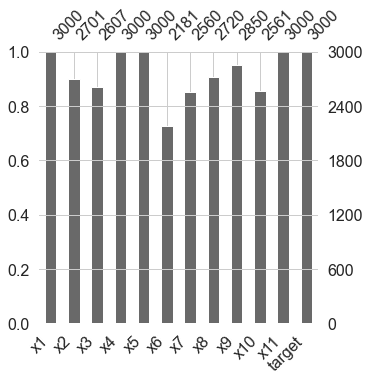

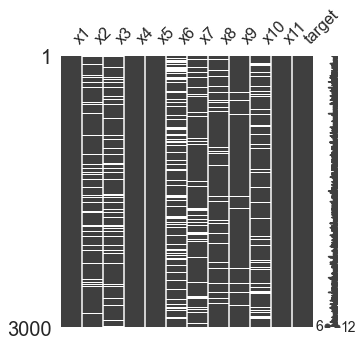

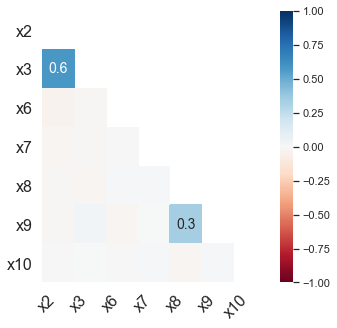

In [4]:
# answer
for columns in mis_data:
    print(columns,"--> # of missing value", mis_data[columns].isna().sum(), 
         "percentage= %.4f" % (mis_data[columns].isna().sum()/ len(mis_data)*100))
msno.bar(mis_data, figsize=(5,5)) 
msno.matrix(mis_data, figsize=(5,5))
msno.heatmap(mis_data, figsize=(5,5))

**Heatmap :** Heatmap shows the correlation of missingness between every 2 columns.
  
A value near -1 means if one variable appears then the other variable is very likely to be missing.  
A value near 0 means there is no dependence between the occurrence of missing values of two variables.  
A value near 1 means if one variable appears then the other variable is very likely to be present.  

According to this,
- x1, x4, x5, x11 and target have no missing values (complete)
- More than %10 percentage of x3, x7 and x10 are missing.
- x2 and x3 are very likely to appear at the same time.
- x8 and x9 are likely to appear at the same time.

**5.Comment on the missingness patterns and the missingness mechanisms by examining original data, missing data and your findings in the previous question.**    

Note: You may also need to perform additional analyses to examine whether the missingness is MCAR, MAR or MNAR. For this question, you can add code cells as many as you want.

**For simplicity to check the missingness mechanism, use the given variable sets for each missing variables.**  

- for x6 consider x1, x3, x7   
- for x7 consider x8, x9, x10   
- for x10 consider x7, x8, x9   

> a. First use only the missing data set.   
> b. Then use both the original data set and the missing data set. Do the outcomes of this part support the findings in part a?

<font color=#C91414> Hint: You can make different comparisons on attributes while a specific attribute exists or missing. In part B, you can simply reuse your tests and codes on complete data set.</font> 
 

**Missingness mechanism (or mechanisms)** concerns the relationship between missingness and the values of variables in the data matrix. 

**MCAR:** Missingness of a variable is completely independent of itself and other variables.
- x7 is missing completely at random.
  
**MAR:** Missingness of a variable is dependent on another variable.   
- If x1 is greater than 46, x6 is missing, in the mis_data set.

**MNAR:** Missingness of a variable is related to itself.
- If x10 is greater than 67, x10 is missing in the mis_data set. 
- There is no prior information about the data set, and we don't know the context of the domain. So, in Part A, just looking at numbers and detecting the MNAR mechanism of x10 is very difficult. 

------------- 
**Missingness pattern** describes which values are missing and which values are observed in the data matrix. 



Missingness pattern can be called as **general.** (Please see Lecture Notes)

Justify your comments by carrying out some analysis.

In [5]:
## answer
x2_mis_data_index=mis_data[mis_data["x2"].isnull()].index
x3_mis_data_index=mis_data[mis_data["x3"].isnull()].index
x6_mis_data_index=mis_data[mis_data["x6"].isnull()].index
x7_mis_data_index=mis_data[mis_data["x7"].isnull()].index
x8_mis_data_index=mis_data[mis_data["x8"].isnull()].index
x9_mis_data_index=mis_data[mis_data["x9"].isnull()].index
x10_mis_data_index=mis_data[mis_data["x10"].isnull()].index
x11_mis_data_index=mis_data[mis_data["x11"].isnull()].index

real_value_mis_x2= data.loc[x2_mis_data_index,"x2"]
real_value_mis_x3= data.loc[x3_mis_data_index,"x3"]
real_value_mis_x6= data.loc[x6_mis_data_index,"x6"]
real_value_mis_x7= data.loc[x7_mis_data_index,"x7"]
real_value_mis_x8= data.loc[x8_mis_data_index,"x8"]
real_value_mis_x9= data.loc[x9_mis_data_index,"x9"]
real_value_mis_x10= data.loc[x10_mis_data_index,"x10"]
real_value_mis_x11= data.loc[x11_mis_data_index,"x11"]


x2_complete_index=mis_data[mis_data["x2"].notnull()].index
x3_complete_index=mis_data[mis_data["x3"].notnull()].index
x6_complete_index=mis_data[mis_data["x6"].notnull()].index
x7_complete_index=mis_data[mis_data["x7"].notnull()].index
x8_complete_index=mis_data[mis_data["x8"].notnull()].index
x9_complete_index=mis_data[mis_data["x9"].notnull()].index
x10_complete_index=mis_data[mis_data["x10"].notnull()].index
x11_complete_index=mis_data[mis_data["x11"].notnull()].index

## derived from nonmissing original data set
x2_nonmis_data=data.loc[mis_data[mis_data["x2"].notnull()].index, "x2"]
x3_nonmis_data=data.loc[mis_data[mis_data["x3"].notnull()].index, "x3"]
x6_nonmis_data=data.loc[mis_data[mis_data["x6"].notnull()].index, "x6"]
x7_nonmis_data=data.loc[mis_data[mis_data["x7"].notnull()].index, "x7"]
x8_nonmis_data=data.loc[mis_data[mis_data["x8"].notnull()].index, "x8"]
x9_nonmis_data=data.loc[mis_data[mis_data["x9"].notnull()].index, "x9"]
x10_nonmis_data=data.loc[mis_data[mis_data["x10"].notnull()].index, "x10"]
x11_nonmis_data=data.loc[mis_data[mis_data["x11"].notnull()].index, "x11"]


def create_missingness_map(mis_data):
    columns=mis_data.columns
    mis_map=pd.DataFrame(data=np.zeros(mis_data.shape), columns=mis_data.columns, dtype=int)
    for col in columns:
        col_mis_index=mis_data[mis_data[col].isnull()].index
        mis_map.loc[col_mis_index,col]=1    
    return mis_map
mis_map=create_missingness_map(mis_data)

Part A was conducted by using only missing data set
Visualization of atrributes while x6 exists and x6 is nan--------


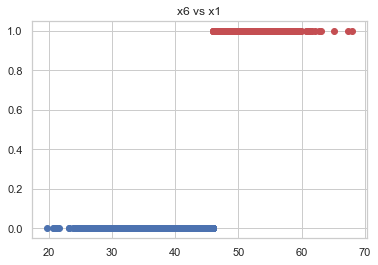

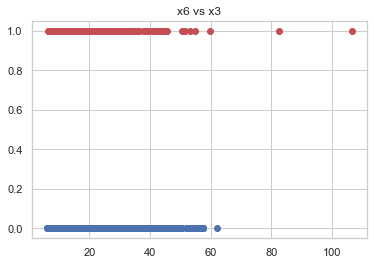

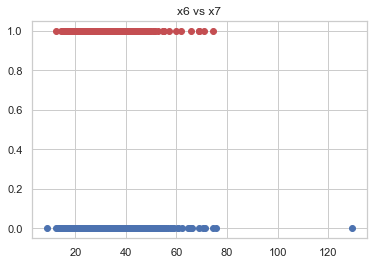

-------- mean comparison of x1  while x6 exists and x6 is nan--------
x1  p value:0.0000
Reject null hypothesis >> DIFFERENT MEAN
-------- mean comparison of x3  while x6 exists and x6 is nan--------
x3  p value:0.3730
Fail to reject null hypothesis >> same mean
-------- mean comparison of x7  while x6 exists and x6 is nan--------
x7  p value:0.9961
Fail to reject null hypothesis >> same mean


In [6]:
print("Part A was conducted by using only missing data set")

print("Visualization of atrributes while x6 exists and x6 is nan--------")
check_x6=["x1", "x3", "x7"]
for column in check_x6:
    plt.title("x6 vs "+ column)
    plt.scatter(mis_data.loc[x6_complete_index, column],mis_map.loc[x6_complete_index,"x6"],  )  
    plt.scatter(mis_data.loc[x6_mis_data_index,column],mis_map.loc[x6_mis_data_index,"x6"], color="r")
    plt.show()

for column in check_x6:
    print("-------- mean comparison of", column, " while x6 exists and x6 is nan--------")
    stat, pvalue= stats.mannwhitneyu(mis_data.loc[x6_mis_data_index,column], mis_data.loc[x6_complete_index,column],alternative="two-sided")
    
    print(column, " p value:%.4f" % pvalue)
    if pvalue <0.05:
        print("Reject null hypothesis >> DIFFERENT MEAN")
    else:
        print("Fail to reject null hypothesis >> same mean")          

Part B was conducted by using both original and missing data set
Visualization of atrributes while x6 exists and x6 is nan--------


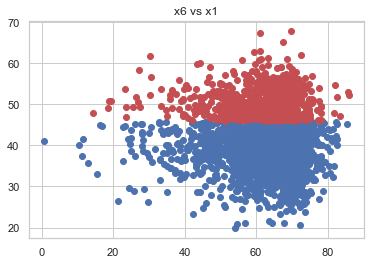

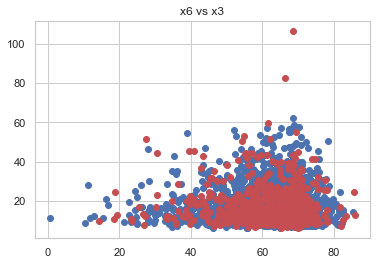

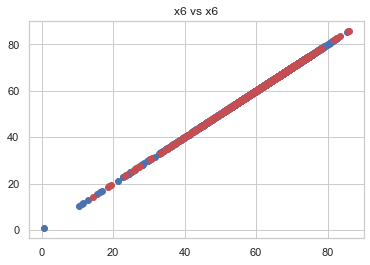

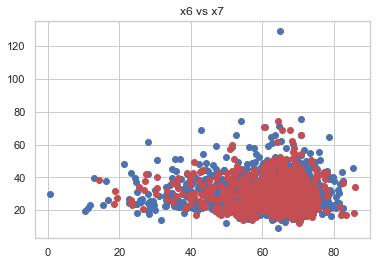

-------- mean comparison of x1  while x6 exists and x6 is nan--------
x1  p value:0.0000
Reject null hypothesis >> DIFFERENT MEAN
-------- mean comparison of x3  while x6 exists and x6 is nan--------
x3  p value:0.3418
Fail to reject null hypothesis >> same mean
-------- mean comparison of x6  while x6 exists and x6 is nan--------
x6  p value:0.1781
Fail to reject null hypothesis >> same mean
-------- mean comparison of x7  while x6 exists and x6 is nan--------
x7  p value:0.5271
Fail to reject null hypothesis >> same mean


In [7]:
print("Part B was conducted by using both original and missing data set")
#### So we can check also x6 itself
print("Visualization of atrributes while x6 exists and x6 is nan--------")
check_x6=["x1", "x3", "x6", "x7"]
for column in check_x6:
    plt.title("x6 vs "+ column)
    plt.scatter(x6_nonmis_data,   data.loc[mis_data[mis_data["x6"].notnull()].index, column])
    plt.scatter(real_value_mis_x6,data.loc[x6_mis_data_index,column], color="r")
    plt.show()
    
    
#### x6'nin kayıp olduğu durumdaki x1'lerin ortalaması ile 
#### x6'nın var olduğu durumdaki x1'lerin meani arasında fark var mı?

for column in check_x6:
    print("-------- mean comparison of", column, " while x6 exists and x6 is nan--------")
    stat, pvalue= stats.mannwhitneyu(data.loc[mis_data[mis_data["x6"].notnull()].index,column],data.loc[x6_mis_data_index,column],alternative="two-sided")
    
    print(column, " p value:%.4f" % pvalue)
    if pvalue <0.05:
        print("Reject null hypothesis >> DIFFERENT MEAN")
    else:
        print("Fail to reject null hypothesis >> same mean")  
        

------------
-----------

Part A was conducted by using only missing data set
Visualization of atrributes while x7 exists and x7 is nan--------


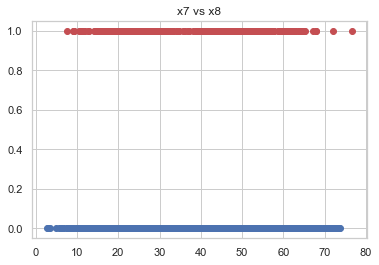

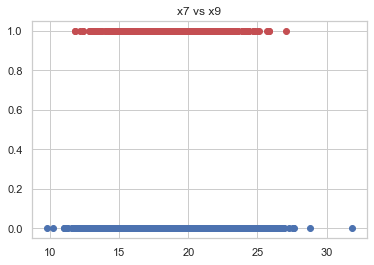

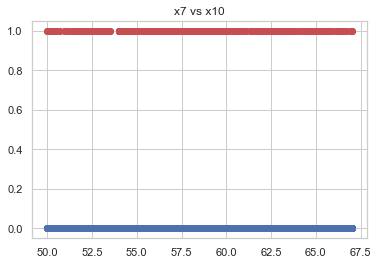

-------- mean comparison of x8  while x7 exists and x7 is nan--------
x8  p value:0.8785
Fail to reject null hypothesis >> same mean
-------- mean comparison of x9  while x7 exists and x7 is nan--------
x9  p value:0.4925
Fail to reject null hypothesis >> same mean
-------- mean comparison of x10  while x7 exists and x7 is nan--------
x10  p value:0.8062
Fail to reject null hypothesis >> same mean


In [8]:
print("Part A was conducted by using only missing data set")
print("Visualization of atrributes while x7 exists and x7 is nan--------")
check_x7=["x8","x9", "x10"]
for column in check_x7:
    plt.title("x7 vs "+ column)
    plt.scatter(mis_data.loc[x7_complete_index, column],mis_map.loc[x7_complete_index,"x7"],  )  
    plt.scatter(mis_data.loc[x7_mis_data_index,column],mis_map.loc[x7_mis_data_index,"x7"], color="r")
    plt.show()

for column in check_x7:
    print("-------- mean comparison of", column, " while x7 exists and x7 is nan--------")
    stat, pvalue= stats.mannwhitneyu(mis_data.loc[x7_mis_data_index,column], mis_data.loc[x7_complete_index,column],alternative="two-sided")
    
    print(column, " p value:%.4f" % pvalue)
    if pvalue <0.05:
        print("Reject null hypothesis >> DIFFERENT MEAN")
    else:
        print("Fail to reject null hypothesis >> same mean")  

Part B was conducted by using both original and missing data set
Visualization of atrributes while x7 exists and x7 is nan--------


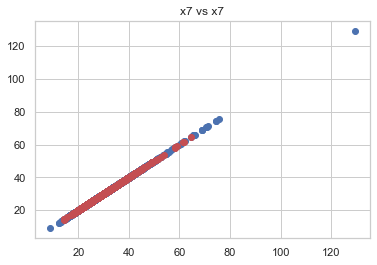

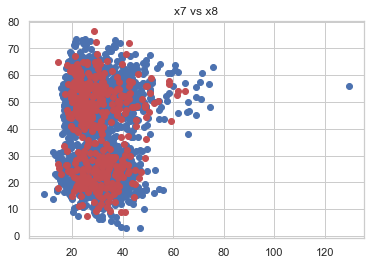

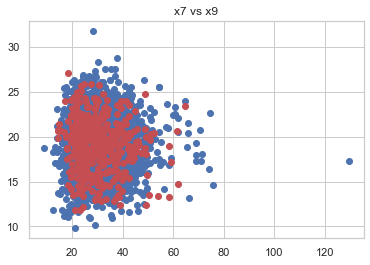

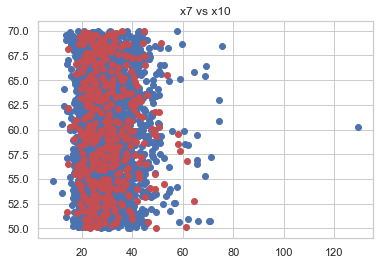

-------- mean comparison of x7  while x7 exists and x7 is nan--------
x7  p value:0.6519
Fail to reject null hypothesis >> same mean
-------- mean comparison of x8  while x7 exists and x7 is nan--------
x8  p value:0.9022
Fail to reject null hypothesis >> same mean
-------- mean comparison of x9  while x7 exists and x7 is nan--------
x9  p value:0.5940
Fail to reject null hypothesis >> same mean
-------- mean comparison of x10  while x7 exists and x7 is nan--------
x10  p value:0.7560
Fail to reject null hypothesis >> same mean


In [9]:
print("Part B was conducted by using both original and missing data set")
#### So we can check also x7 itself
print("Visualization of atrributes while x7 exists and x7 is nan--------")
check_x7=["x7","x8","x9", "x10"]
for column in check_x7:
    plt.title("x7 vs "+ column)
    plt.scatter(x7_nonmis_data,   data.loc[mis_data[mis_data["x7"].notnull()].index, column])
    plt.scatter(real_value_mis_x7,data.loc[x7_mis_data_index,column], color="r")
    plt.show()
    
for column in check_x7:
    print("-------- mean comparison of", column, " while x7 exists and x7 is nan--------")

    stat, pvalue= stats.mannwhitneyu(data.loc[mis_data[mis_data["x7"].notnull()].index,column],data.loc[x7_mis_data_index,column],alternative="two-sided")
    
    print(column, " p value:%.4f" % pvalue)
    if pvalue <0.05:
        print("Reject null hypothesis >> DIFFERENT MEAN")
    else:
        print("Fail to reject null hypothesis >> same mean")   

----------
--------

Part A was conducted by using only missing data set
Visualization of atrributes while x10 exists and x10 is nan--------


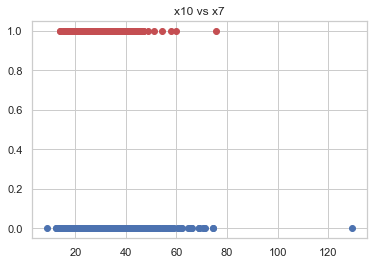

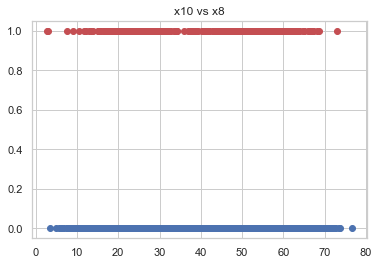

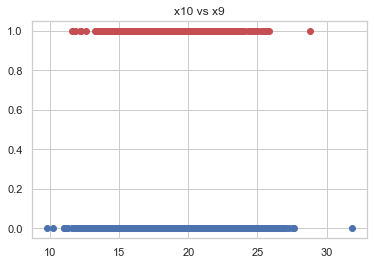

-------- mean comparison of x7  while x10 exists and x10 is nan--------
x7  p value:0.2458
Fail to reject null hypothesis >> same mean
-------- mean comparison of x8  while x10 exists and x10 is nan--------
x8  p value:0.3616
Fail to reject null hypothesis >> same mean
-------- mean comparison of x9  while x10 exists and x10 is nan--------
x9  p value:0.7562
Fail to reject null hypothesis >> same mean


In [10]:
print("Part A was conducted by using only missing data set")

print("Visualization of atrributes while x10 exists and x10 is nan--------")
check_x10=["x7", "x8", "x9"]
for column in check_x10:
    plt.title("x10 vs "+ column)
    plt.scatter(mis_data.loc[x10_complete_index, column],mis_map.loc[x10_complete_index,"x10"],  )  
    plt.scatter(mis_data.loc[x10_mis_data_index,column],mis_map.loc[x10_mis_data_index,"x10"], color="r")
    plt.show()

for column in check_x10:
    print("-------- mean comparison of", column, " while x10 exists and x10 is nan--------")
    stat, pvalue= stats.mannwhitneyu(mis_data.loc[x10_mis_data_index,column], mis_data.loc[x10_complete_index,column],alternative="two-sided")
    
    print(column, " p value:%.4f" % pvalue)
    if pvalue <0.05:
        print("Reject null hypothesis >> DIFFERENT MEAN")
    else:
        print("Fail to reject null hypothesis >> same mean")   

Part B was conducted by using both original and missing data set
Visualization of atrributes while x10 exists and x10 is nan--------


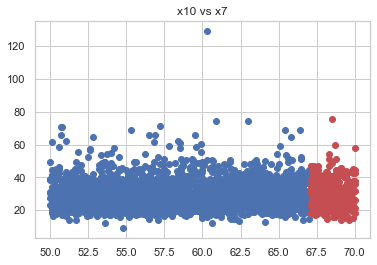

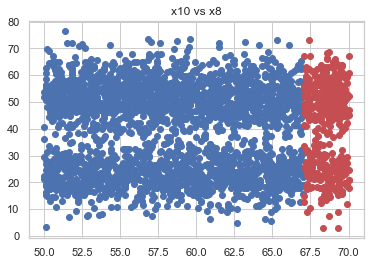

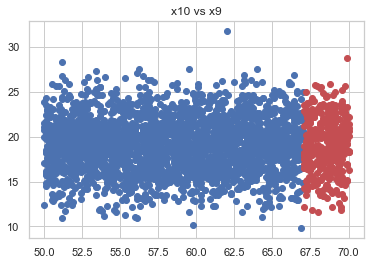

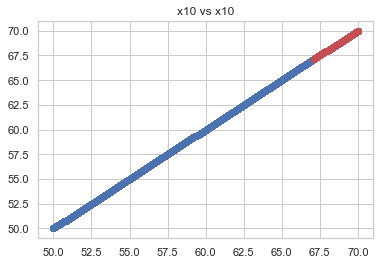

-------- mean comparison of x7  while x10 exists and x10 is nan--------
x7  p value:0.0750
Fail to reject null hypothesis >> same mean
-------- mean comparison of x8  while x10 exists and x10 is nan--------
x8  p value:0.1028
Fail to reject null hypothesis >> same mean
-------- mean comparison of x9  while x10 exists and x10 is nan--------
x9  p value:0.9508
Fail to reject null hypothesis >> same mean
-------- mean comparison of x10  while x10 exists and x10 is nan--------
x10  p value:0.0000
Reject null hypothesis >> DIFFERENT MEAN


In [11]:
print("Part B was conducted by using both original and missing data set")
print("Visualization of atrributes while x10 exists and x10 is nan--------")
check_x10=["x7", "x8", "x9", "x10"]
for column in check_x10:
    plt.title("x10 vs "+ column)
    plt.scatter(x10_nonmis_data,   data.loc[mis_data[mis_data["x10"].notnull()].index, column])
    plt.scatter(real_value_mis_x10,data.loc[x10_mis_data_index,column], color="r")
    plt.show()
    
for column in check_x10:
    print("-------- mean comparison of", column, " while x10 exists and x10 is nan--------")

    stat, pvalue= stats.mannwhitneyu(data.loc[mis_data[mis_data["x10"].notnull()].index,column],data.loc[x10_mis_data_index,column],alternative="two-sided")
    
    print(column, " p value:%.4f" % pvalue)
    if pvalue <0.05:
        print("Reject null hypothesis >> DIFFERENT MEAN")
    else:
        print("Fail to reject null hypothesis >> same mean")

        
       

----
Again I checked whether the distribution of the data is the same in case an attribute i.e x6 itself is missing and exists.

$H_{0}$: The samples come from same distribution.  
$H_{1}$: The samples come from different distribution.     
Assume that alpha=0.05 If p-value is >0.05, it can be said that data samples come from same distribution.

In [12]:
missing_vars=[ "x6","x7", "x10"]
for column in missing_vars:
    print("----------",column,"--------")
    stat, pvalue= stats.ks_2samp(data.loc[mis_data[mis_data[column].notnull()].index, column],
                                data.loc[mis_data[mis_data[column].isnull()].index,column])
    print(column, " p value:%.4f" % pvalue)
    if pvalue <0.05:
        print("Reject null hypothesis >> The samples come from DIFFERENT distribution.")
    else:
        print("Fail to reject null hypothesis >> The samples come from same distribution.")  
     

---------- x6 --------
x6  p value:0.1536
Fail to reject null hypothesis >> The samples come from same distribution.
---------- x7 --------
x7  p value:0.8265
Fail to reject null hypothesis >> The samples come from same distribution.
---------- x10 --------
x10  p value:0.0000
Reject null hypothesis >> The samples come from DIFFERENT distribution.


In [13]:
# You  can add extra code cells.

In [14]:
# You  can add extra code cells.

**6. Drop na values from the data and save the dataframe as "mis_data_wona".** 

In [15]:
# answer
mis_data_wona = mis_data.dropna()
print(mis_data_wona.shape)
mis_data_wona.head()

(1170, 12)


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,target
2,42.68,2.07,7.502324,1,6,67.82,26.48,25.08,21.74,62.3,11.40,0
6,41.42,7.66,16.820178,1,2,72.48,30.74,21.40,16.41,66.1,10.22,0
8,41.69,2.97,33.977555,0,6,68.95,27.54,27.43,23.70,61.7,11.61,0
9,38.66,1.88,16.620460,2,5,59.70,25.58,19.70,17.28,61.3,21.10,0
14,42.35,8.80,22.319527,1,7,67.06,39.90,23.85,19.51,59.3,5.38,0


**7. Impute missing values in mis_data with median and save the dataframe as mis_data_med.** 

In [16]:
# answer
mis_data_med = mis_data.copy()
imp_med = SimpleImputer(missing_values=np.nan, strategy='median')
imp_med.fit(mis_data_med)
mis_data_med = imp_med.transform(mis_data_med)
mis_data_med= pd.DataFrame(mis_data_med, columns=mis_data.columns)
mis_data_med.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,target
0,54.52,2.22,10.386904,0.0,6.0,65.68,34.540,20.910,19.08,61.7,8.73,0.0
1,45.06,8.71,16.769842,0.0,3.0,74.88,46.530,45.705,19.08,64.0,10.08,1.0
2,42.68,2.07,7.502324,1.0,6.0,67.82,26.480,25.080,21.74,62.3,11.40,0.0
3,28.96,9.19,14.647223,1.0,8.0,54.74,28.335,22.360,18.75,57.3,16.85,1.0
4,40.06,4.88,22.511603,1.0,7.0,61.57,28.380,45.705,17.62,58.5,12.74,0.0


In [17]:
mis_data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,target
0,54.52,2.22,10.386904,0,6,NaN,34.54,20.91,NaN,61.7,8.73,0
1,45.06,8.71,16.769842,0,3,74.88,46.53,NaN,NaN,64.0,10.08,1
2,42.68,2.07,7.502324,1,6,67.82,26.48,25.08,21.74,62.3,11.40,0
3,28.96,9.19,NaN,1,8,54.74,NaN,22.36,18.75,57.3,16.85,1
4,40.06,4.88,22.511603,1,7,61.57,28.38,NaN,17.62,NaN,12.74,0


**8. Impute missing values in mis_data with mean and save the dataframe as mis_data_mean.**

In [18]:
# answer
mis_data_mean = mis_data.copy()
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(mis_data_mean)
mis_data_mean = imp_mean.transform(mis_data_mean)
mis_data_mean= pd.DataFrame(mis_data_mean, columns=mis_data.columns)
mis_data_mean.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,target
0,54.52,2.22,10.386904,0.0,6.0,62.941302,34.540000,20.910000,19.068179,61.700000,8.73,0.0
1,45.06,8.71,16.769842,0.0,3.0,74.880000,46.530000,40.649761,19.068179,64.000000,10.08,1.0
2,42.68,2.07,7.502324,1.0,6.0,67.820000,26.480000,25.080000,21.740000,62.300000,11.40,0.0
3,28.96,9.19,17.216713,1.0,8.0,54.740000,29.643449,22.360000,18.750000,57.300000,16.85,1.0
4,40.06,4.88,22.511603,1.0,7.0,61.570000,28.380000,40.649761,17.620000,58.446896,12.74,0.0
